# Solución a objetos estelares compactos autogravitantes con distribución anisótropa 

In [3]:
from scipy.integrate import solve_ivp
from scipy.integrate import quad
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import astropy.constants as ast

In [4]:
M = 1.4*(1.989e30) #masa total
#M = 1.989e5
#R = 696340e3 #Radio
R = 10e3
#P = 2.65e16 #Presión central
P = 10e34
#D = 150e3 #Densidad central
D = 8e18
c = ast.c.value
G = ast.G.value

In [5]:
#Son básicamente las magnitudes tildadas:

r_ = sym.Symbol('ŕ') #Radio normalizado
p_ = sym.Symbol('ṕ') #Presión radial normalizada
pt_ = sym.Symbol('ṕt') #Presión tangencial normalizada 
d_ = sym.Symbol('ð') #Densidad normalizada
m_ = sym.Symbol('ḿ') #Masa normalizada

#Ecuaciones adimensionales auxiliares
u = M*G/(R*(c)**2)
k = P/(D*(c)**2)
n = (D/(M/((4/3)*np.pi*(R**3))))


**NOTA**: los símbolos aparecen como r,p,dt,d y m, pero hacen referencia a tales magnitudes normalizadas, en caso de hallar el r sin normalizar basta con multiplicar con R

## Ecuaciones estructurales estelares

In [6]:
#Ecuación estructural newtoniana
def dPdr_N(m,d,aniso):
    return  -(u/k)*(m*d/(r_**2)) + 2*aniso/r_ 

#Ecuación estructural de Einstein
def dPdr_E(m,d,aniso):
        return ((-u/k)*(m*d/(r_**2)))*(1+k*(p_/d))*(1+3*n*k*((p_*r_**3)/m))*(1-2*u*(m/r_))**-1 + 2*aniso/r_

In [7]:
def density():
    B = (5/3)*(1-3/n) 
    return (1-B*r_**2) #Perfil de densidades tipo Gokhroo-Mehra

def mass():
    f = ((n*r_**2)*density())
    return sym.integrate(f,(r_))

In [18]:
density()

1 - 1.25118274054133*ŕ**2

Text(0.5, 0, 'Distancia radial normalizada')

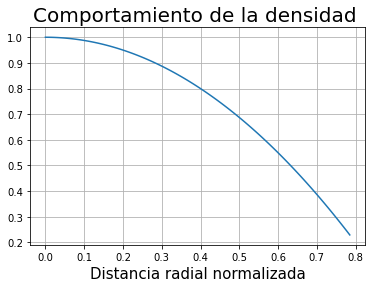

In [8]:
den = sym.lambdify(r_,density())
x=np.linspace(0,0.785,100)
plt.plot(x, den(x))
plt.grid()
plt.title('Comportamiento de la densidad ', fontsize=20)
plt.xlabel('Distancia radial normalizada', fontsize=15)

In [9]:
mass()

-3.01138663102913*ŕ**5 + 4.01138663102913*ŕ**3

Text(0, 0.5, 'Masa adimensional')

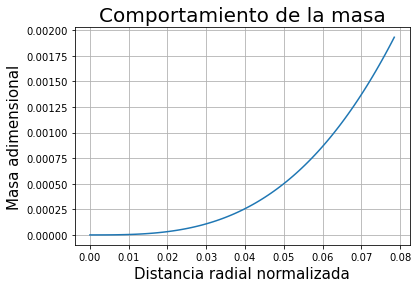

In [11]:
m = sym.lambdify(r_,mass())
x=np.linspace(0,0.0785,100)
plt.grid()
plt.plot(x, m(x))
plt.title('Comportamiento de la masa', fontsize=20)
plt.xlabel('Distancia radial normalizada', fontsize=15)
plt.ylabel('Masa adimensional', fontsize=15)

## Ecuaciones de anisotropía

In [12]:
def newt(C,m):
    return (C*G*m*density())/r_ #Anisotropía para el encuadre Newton

def HIM(C):
    return C*(p_/r_) #Anisotropía de Horvat-Ilijic-Marunovic

In [13]:
def aniso_ein(den,mass,C):
    return G* (C/r_)*(1+p_/den)*(1+(4*np.pi*(r_**3)*p_/(mass)))*(1-2*(mass/r_))**-1

def aniso_n(C):
    return C * G * (mass()*density()/r_)

<lambdifygenerated-4>:2: RuntimeWarning: invalid value encountered in divide
  return ((1 - 1.25118274054133*ŕ**2)*(-0.000200988977914777*ŕ**5 + 0.000267731977914777*ŕ**3)/ŕ)


Text(0.5, 0, 'Distancia radial adimensional')

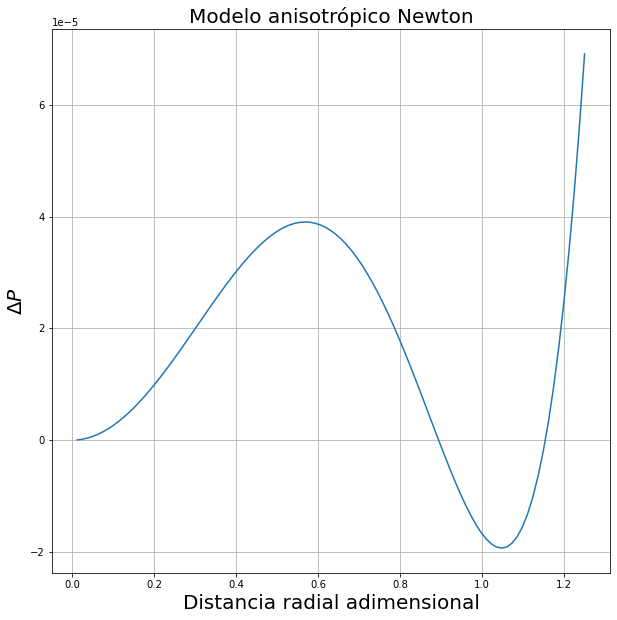

In [14]:
l = newt(1e6,mass())
s = sym.lambdify(r_,l)
rad = np.linspace(0,1.25,100)
plt.figure(figsize=(10,10))
plt.plot(rad, s(rad))
plt.grid()
plt.title('Modelo anisotrópico Newton',fontsize=20)
plt.ylabel(r'$\Delta P$', fontsize=20)
plt.xlabel('Distancia radial adimensional', fontsize=20)


## Solucion numérica a las ecuaciones estructurales

### Aproximación Newton

Text(0.5, 0, 'Distancia radial adimensional')

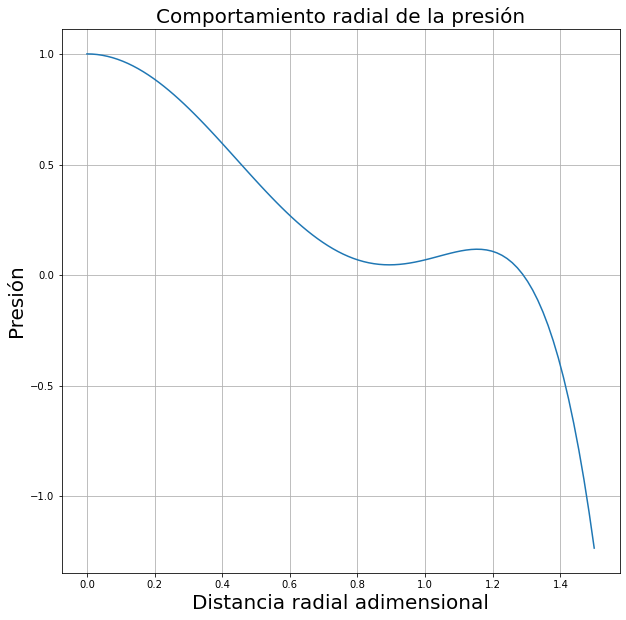

In [15]:
inte= sym.integrate(dPdr_N(mass(),density(),newt(10,mass())),r_) +1
N = sym.lambdify(r_, inte)
x=np.linspace(0,1.5,100)
plt.figure(figsize=(10,10))

plt.plot(x, N(x))
plt.grid()
plt.title('Comportamiento radial de la presión',fontsize=20)
plt.ylabel('Presión', fontsize=20)
plt.xlabel(r'Distancia radial adimensional', fontsize=20)

Text(0.5, 0, 'Distancia radial adimensional')

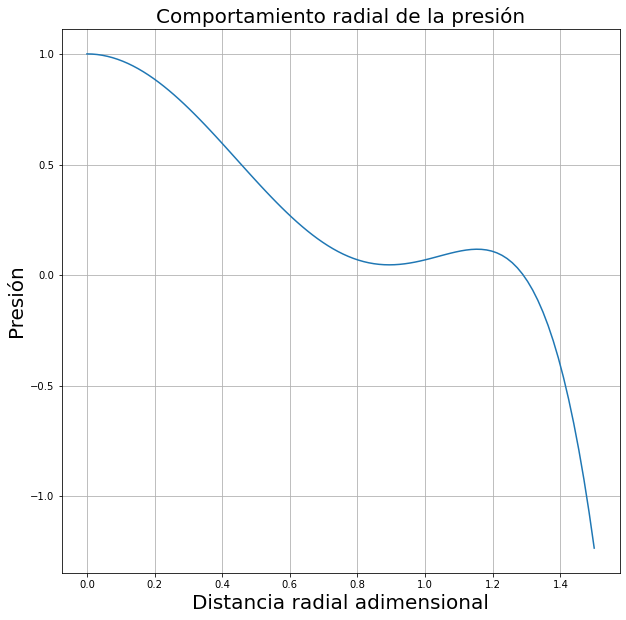

In [16]:
inter= sym.integrate(dPdr_N(mass(),density(),newt(10,mass())),r_) +1
N = sym.lambdify(r_, inter)
x=np.linspace(0,1.5,100)
plt.figure(figsize=(10,10))

plt.plot(x, N(x))
plt.grid()
plt.title('Comportamiento radial de la presión',fontsize=20)
plt.ylabel('Presión', fontsize=20)
plt.xlabel(r'Distancia radial adimensional', fontsize=20)

### Aproximación Einstein

Text(0.5, 0, 'Distancia radial adimensional')

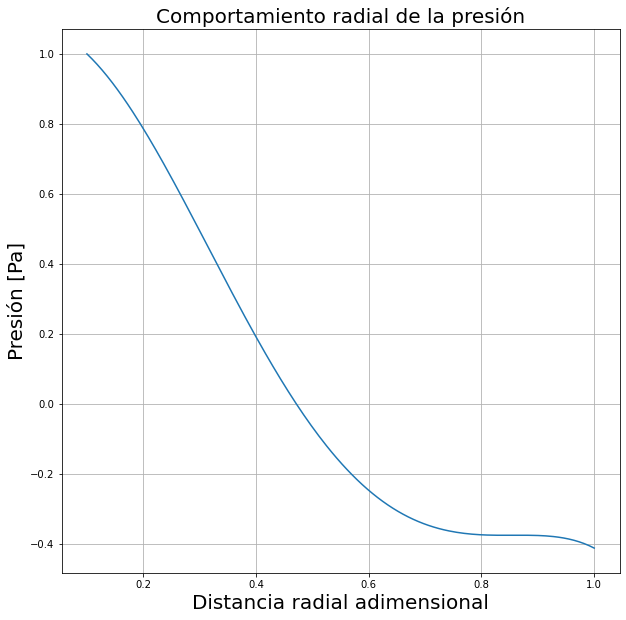

In [17]:
ein = dPdr_E(mass(),density(),aniso_ein(density(),mass(),10))
ein_var = sym.lambdify((r_,p_),ein) 


def ecu(p,r):
    return ein_var(r,p)

t_eval = np.linspace(0.1,1,200)
plt.figure(figsize=(10,10))


od = odeint(ecu,1,t_eval)

plt.plot(t_eval,od)
plt.grid()
plt.title('Comportamiento radial de la presión',fontsize=20)
plt.ylabel('Presión [Pa]', fontsize=20)
plt.xlabel(r'Distancia radial adimensional', fontsize=20)
